In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model



# Dynamic Pressure

In [108]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [109]:
Normal_DP

,Unnamed: 0,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...,...
919995,919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [110]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [111]:
Normal_DPx=Normal_DP.drop(columns=['Time '])
Normal_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [112]:
#Normalizing the data
for col in Normal_DPx:
    Normal_DPx[col] = (Normal_DPx[col]-Normal_DPx[col].min())/(Normal_DPx[col].max()-Normal_DPx[col].min())

In [113]:
Normal_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.000000,0.606337,0.140830,0.446902,1.000000
1,1.000000,0.606337,0.140830,0.437408,1.000000
2,1.000000,0.606337,0.140830,0.440331,1.000000
3,1.000000,0.606337,0.140830,0.391129,1.000000
4,1.000000,0.606337,0.140830,0.449095,1.000000
...,...,...,...,...,...
919995,0.282609,0.244143,0.013318,0.587428,0.285016
919996,0.282609,0.244143,0.013318,0.642229,0.285016
919997,0.282609,0.244143,0.013318,0.586456,0.285016
919998,0.282609,0.244143,0.013318,0.612029,0.285016


In [114]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [115]:
Cavitation_DPx=Cavitation_DP.drop(columns=['Time '])
Cavitation_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [116]:
#Normalizing the data
for col in Cavitation_DPx:
    Cavitation_DPx[col] = (Cavitation_DPx[col]-Cavitation_DPx[col].min())/(Cavitation_DPx[col].max()-Cavitation_DPx[col].min())

In [117]:
scaler = StandardScaler()

scaler.fit(Normal_DPx)
Normal_DPx = scaler.transform(Normal_DPx)

scaler.fit(Cavitation_DPx)
Cavitation_DPx = scaler.transform(Cavitation_DPx)


In [118]:
Normal_DPx = pd.DataFrame(Normal_DPx, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure', 'H'])
Cavitation_DPx = pd.DataFrame(Cavitation_DPx, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure', 'H'])


In [119]:
Normal_DPx['Time ']=Normal_DP['Time ']
Normal_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [120]:
Cavitation_DPx['Time ']=Cavitation_DP['Time ']
Cavitation_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [121]:
Normal_DP=Normal_DPx

In [122]:
Cavitation_DP=Cavitation_DPx

In [123]:
df=Normal_DP
Cavdf=Cavitation_DP


In [124]:
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [125]:
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [126]:
X_train=df

In [127]:
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [128]:
X_train=X_train.drop(columns=['Time '])

In [129]:
X_train=np.array(X_train)


In [130]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [131]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [132]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [133]:
X_test=Cavdf

In [134]:
X_test=X_test.drop(columns=['Time '])

In [29]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 33s 16ms/step - loss: 0.2960 - val_loss: 0.1970
Epoch 2/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0750 - val_loss: 0.1350
Epoch 3/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0619 - val_loss: 0.1128
Epoch 4/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0561 - val_loss: 0.1163
Epoch 5/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0538 - val_loss: 0.1218
Epoch 6/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0523 - val_loss: 0.1214
Epoch 7/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0508 - val_loss: 0.1109
Epoch 8/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0489 - val_loss: 0.1035
Epoch 9/150
1797/1797 [==============================] - 30s 16ms/step - loss: 0.0478 - val_loss: 0.1104
Epoch 10/150
1797/1797 [==============================]

In [30]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 54s 2ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

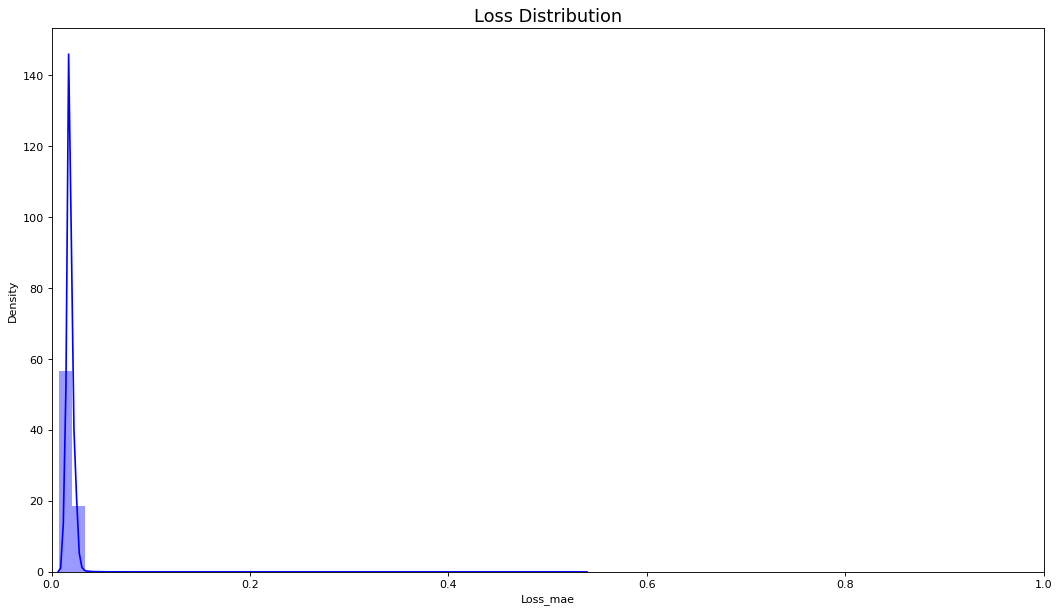

In [31]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [137]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 84s 3ms/step


In [138]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

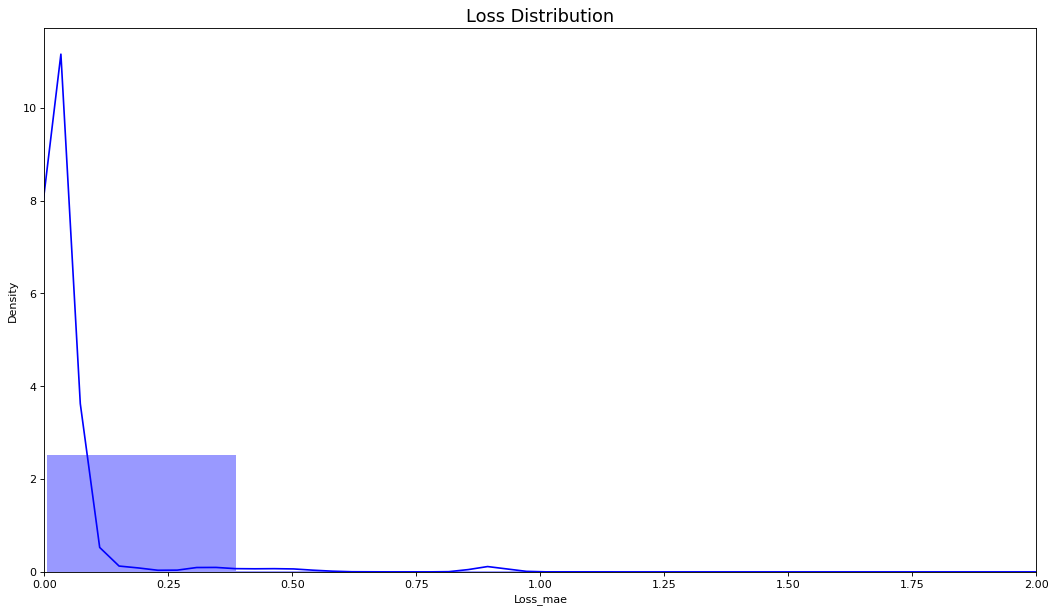

In [139]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.25)

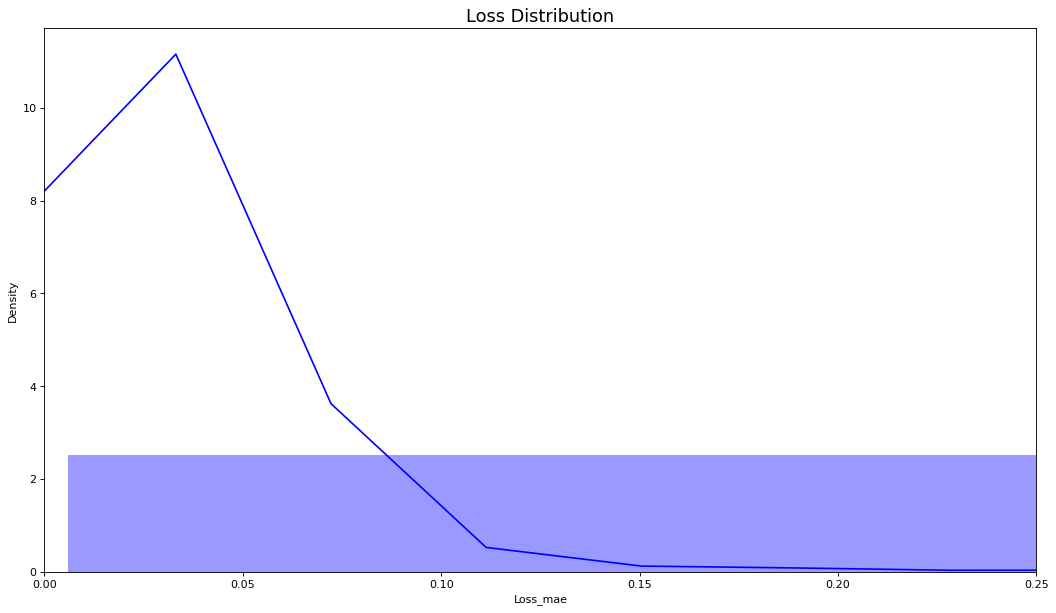

In [140]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.25])

In [142]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.2

In [143]:
test_mae_loss.shape

(1048576, 1)

In [144]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


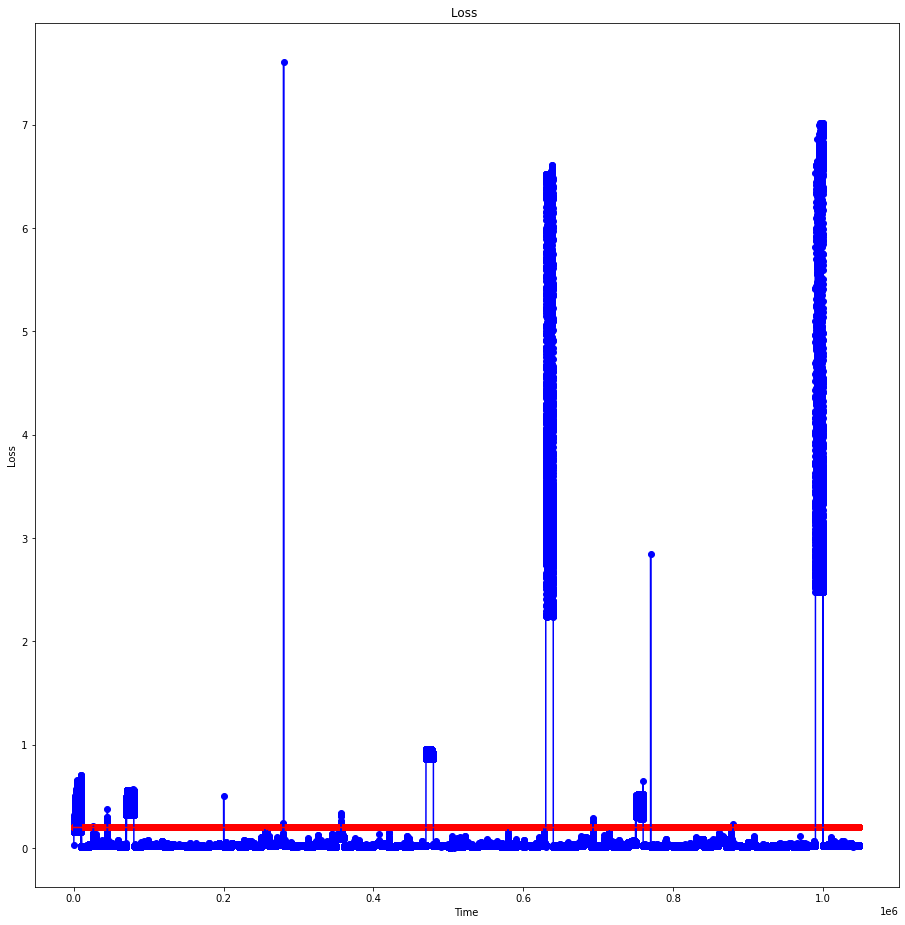

In [145]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [146]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000,0.025793,0.2,False
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,0.170954,0.2,False
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,0.173108,0.2,False
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,0.169029,0.2,False
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,0.181795,0.2,False
...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512,0.024978,0.2,False
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609,0.023095,0.2,False
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707,0.023420,0.2,False
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805,0.024541,0.2,False


In [147]:
test_score_df["anomaly"][1]

False

In [148]:
anomalies=test_score_df


In [149]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
414,1.465952,1.664881,1.177414,-0.660308,1.380058,0.040430,0.265652,0.2,True
416,1.465952,1.664881,1.177414,-0.534256,1.380058,0.040625,0.226860,0.2,True
419,1.465952,1.664881,1.177414,-0.859795,1.380058,0.040918,0.321463,0.2,True
421,1.465952,1.664881,1.177414,-0.657634,1.380058,0.041113,0.264827,0.2,True
422,1.465952,1.664881,1.177414,-0.565769,1.380058,0.041211,0.235272,0.2,True
...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-0.095819,-4.897004,97.655762,2.527367,0.2,True
999996,-4.945634,-1.169536,0.439230,0.547380,-4.897004,97.655859,2.619447,0.2,True
999997,-4.945634,-1.169536,0.439230,-0.250711,-4.897004,97.655957,2.569545,0.2,True
999998,-4.945634,-1.169536,0.439230,0.261233,-4.897004,97.656055,2.497436,0.2,True


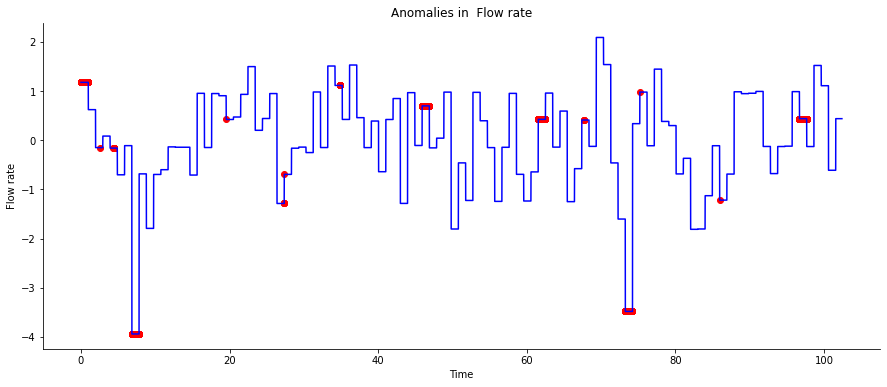

In [150]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

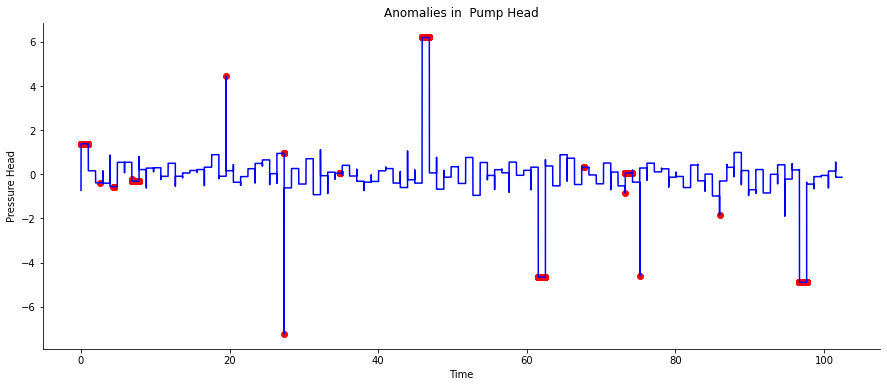

In [151]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

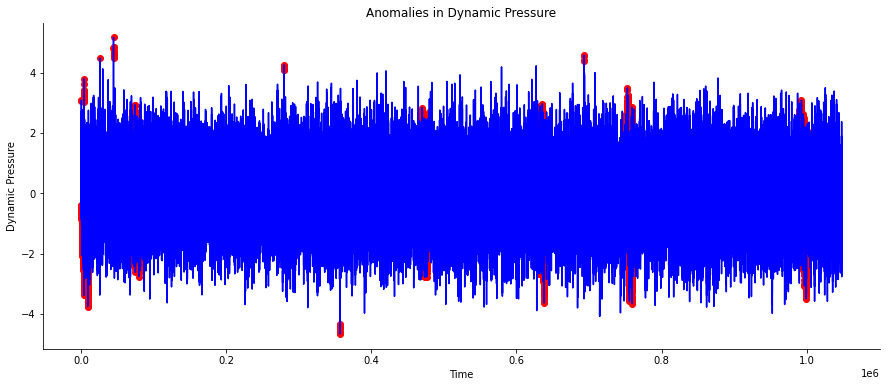

In [152]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

In [153]:
model.save("LSTM01_DP")


INFO:tensorflow:Assets written to: LSTM01_DP\assets


INFO:tensorflow:Assets written to: LSTM01_DP\assets


# Vibration


In [47]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [48]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [49]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [50]:
Normal_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [51]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [52]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [53]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [54]:
Cavitation_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [55]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [56]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [57]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [58]:
df

array([[ 5.93163824,  0.80917635, -1.13622283,  0.68343565,  0.20423912,
         5.90616683],
       [ 5.93163824,  0.80917635, -1.13622283, -0.46506675,  1.09698824,
         5.90616683],
       [ 5.93163824,  0.80917635, -1.13622283, -0.53115516,  1.16243225,
         5.90616683],
       ...,
       [ 0.43957121, -0.95595878, -1.69875996, -0.22946589,  0.05089747,
         0.47555806],
       [ 0.43957121, -0.95595878, -1.69875996, -0.93304906,  1.73246515,
         0.47555806],
       [ 0.43957121, -0.95595878, -1.69875996,  1.07276442,  1.51727423,
         0.47555806]])

In [59]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [60]:
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [61]:
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096


In [62]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [63]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [64]:
X_train=df

In [65]:
X_train=X_train.drop(columns=['Time '])

In [66]:
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [67]:
X_train=np.array(X_train)


In [68]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [69]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [70]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [71]:
X_test=Cavdf

In [72]:
X_test=X_test.drop(columns=['Time '])

In [73]:
X_test.shape

(1048576, 6)

In [74]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 40s 20ms/step - loss: 0.3978 - val_loss: 0.4338
Epoch 2/150
1797/1797 [==============================] - 37s 20ms/step - loss: 0.1222 - val_loss: 0.1913
Epoch 3/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0673 - val_loss: 0.1372
Epoch 4/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0615 - val_loss: 0.1273
Epoch 5/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0583 - val_loss: 0.0988
Epoch 6/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0553 - val_loss: 0.1026
Epoch 7/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0545 - val_loss: 0.1101
Epoch 8/150
1797/1797 [==============================] - 36s 20ms/step - loss: 0.0533 - val_loss: 0.1109
Epoch 9/150
1797/1797 [==============================] - 35s 20ms/step - loss: 0.0520 - val_loss: 0.1042
Epoch 10/150
1797/1797 [==============================]

In [75]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 60s 2ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

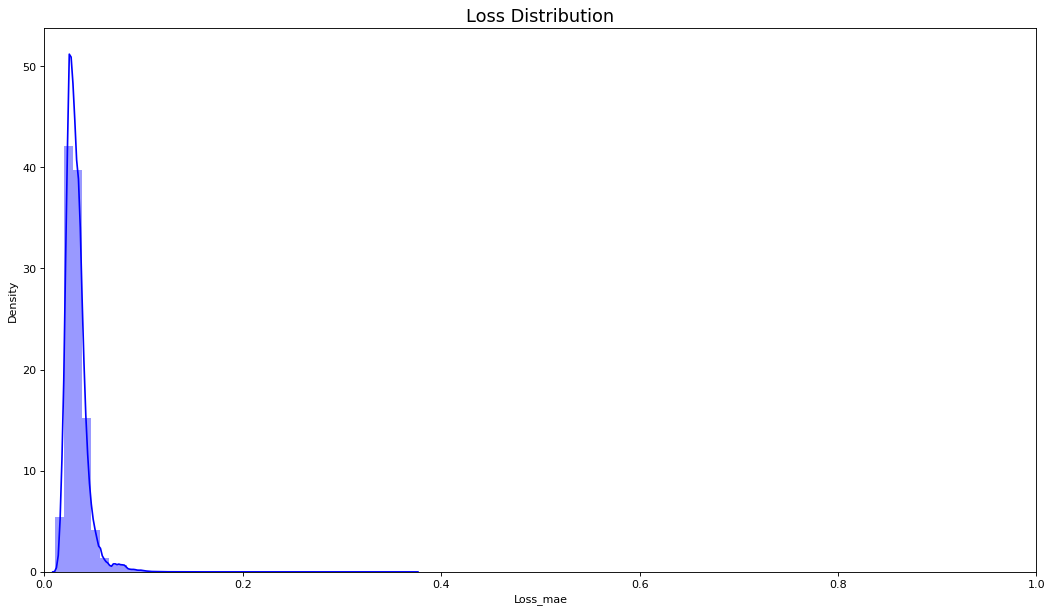

In [76]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [77]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 82s 3ms/step


In [79]:
X_test=np.array(X_test)
X_test.shape=(1048576, 6,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

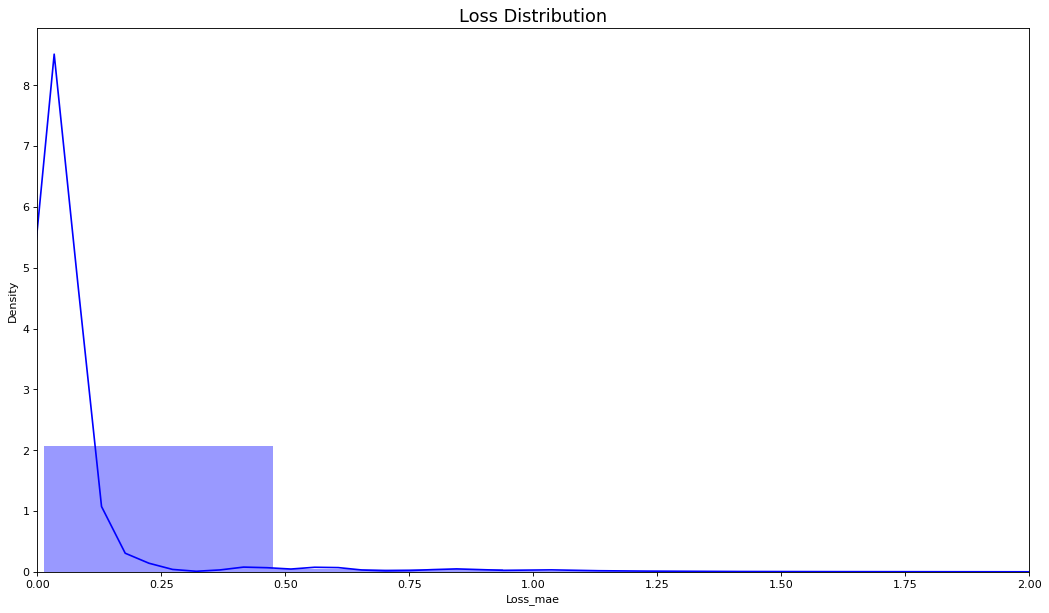

In [80]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

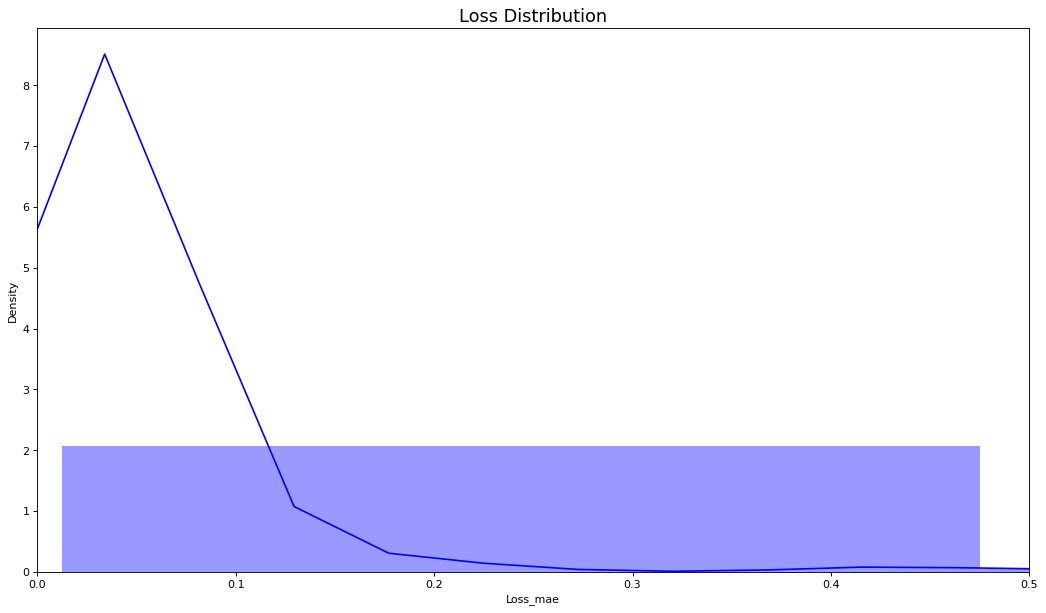

In [82]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [83]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.3

In [84]:
test_mae_loss.shape

(1048576, 1)

In [85]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


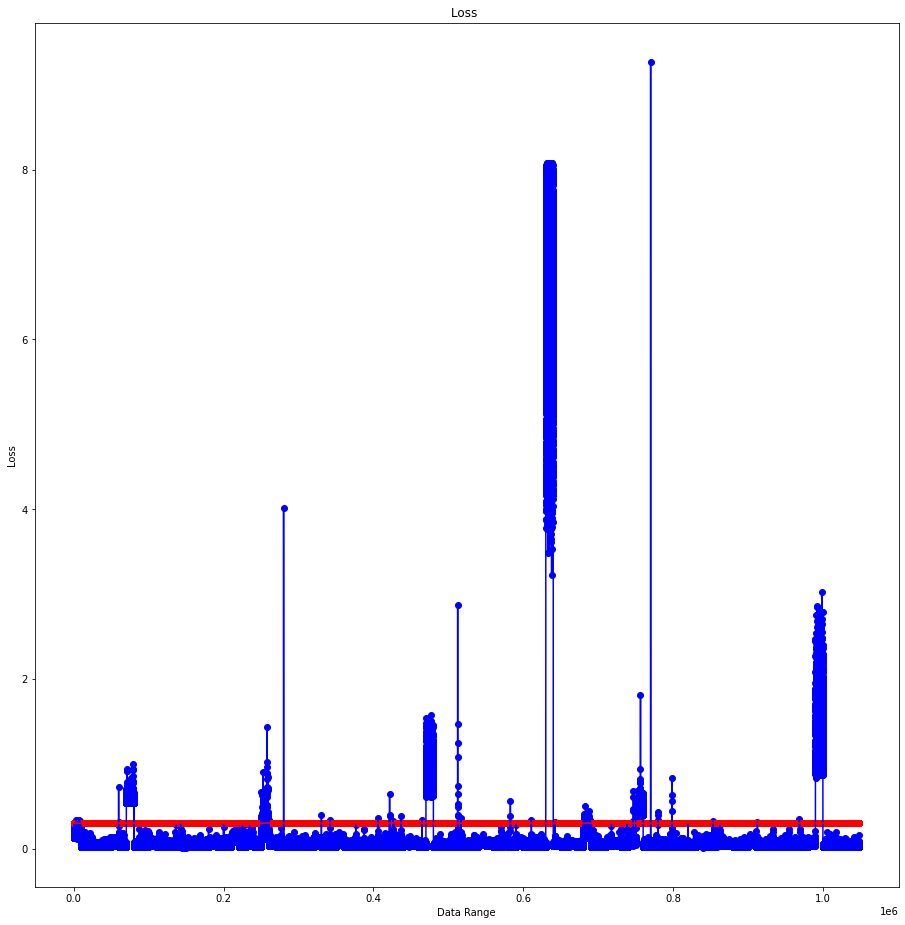

In [86]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [87]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000,0.142548,0.3,False
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.144200,0.3,False
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.146851,0.3,False
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.156714,0.3,False
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.175947,0.3,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512,0.024692,0.3,False
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609,0.025367,0.3,False
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707,0.026223,0.3,False
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805,0.022009,0.3,False


In [88]:
test_score_df["anomaly"][1]

False

In [89]:
anomalies=test_score_df


In [90]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
2349,1.465952,1.664881,1.177414,-1.609963,4.038484,1.380058,0.229395,0.316293,0.3,True
3032,1.465952,1.664881,1.177414,1.953422,3.361317,1.380058,0.296094,0.338088,0.3,True
3735,1.465952,1.664881,1.177414,0.988891,3.573324,1.380058,0.364746,0.313058,0.3,True
5296,1.465952,1.664881,1.177414,1.651131,3.362333,1.380058,0.517187,0.321971,0.3,True
6566,1.465952,1.664881,1.177414,2.761655,3.013294,1.380058,0.641211,0.332094,0.3,True
...,...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-1.258038,1.267361,-4.897004,97.655762,1.171883,0.3,True
999996,-4.945634,-1.169536,0.439230,-1.532954,0.276891,-4.897004,97.655859,1.021884,0.3,True
999997,-4.945634,-1.169536,0.439230,-1.389872,-1.524488,-4.897004,97.655957,1.049072,0.3,True
999998,-4.945634,-1.169536,0.439230,-0.336533,-1.072029,-4.897004,97.656055,1.315749,0.3,True


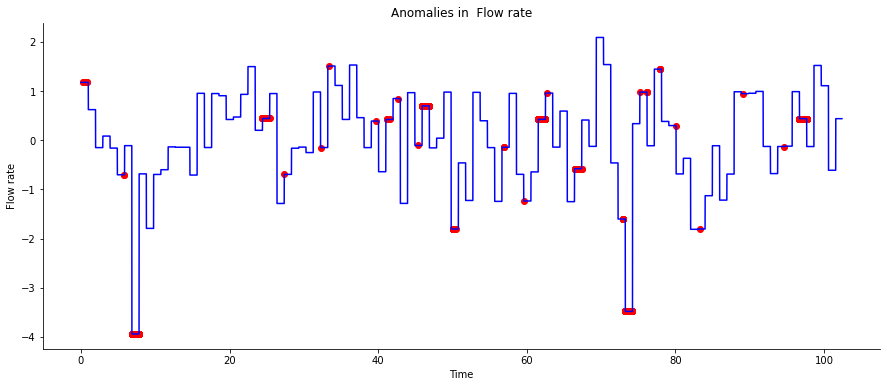

In [91]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

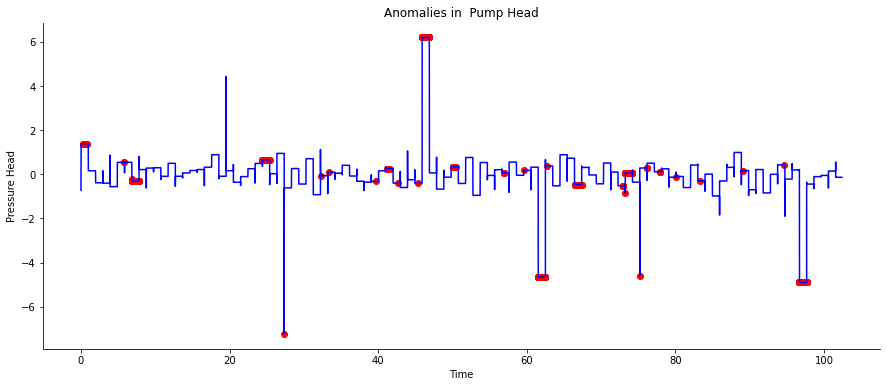

In [95]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

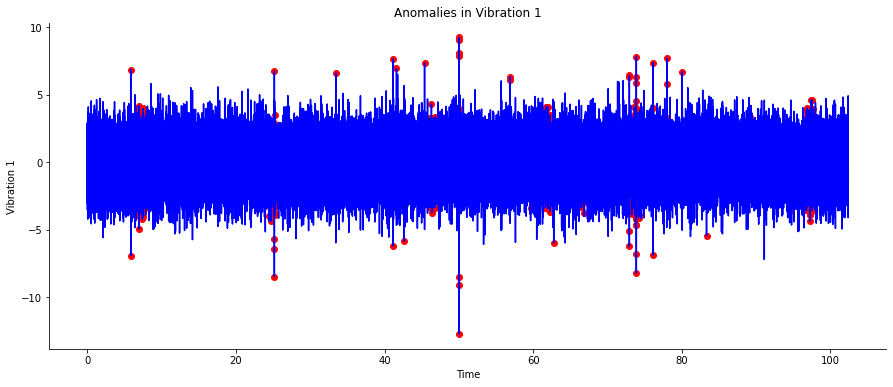

In [92]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")

plt.show()

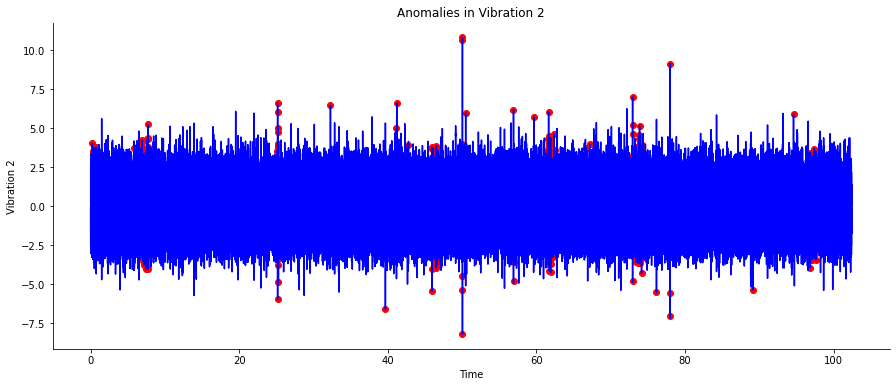

In [93]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")

plt.show()

In [94]:
model.save("LSTM01_Vib")


INFO:tensorflow:Assets written to: LSTM01_Vib\assets


INFO:tensorflow:Assets written to: LSTM01_Vib\assets
